### Data Dictionary

The final module of this course is a project to determine which basketball teams are most likely to make it to the semifinal round of the College Basketball Tournament known as the Final Four.

You will have access to historical data and will apply different classification algorithms to accomplish this.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, jaccard_score

from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("cbb.csv")

In [3]:
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0     North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1          Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2         Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3           Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4             Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
...              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
1401         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
1402        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
1403          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
1404             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
1405       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

      TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0     18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1     20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2     14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3     18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4     18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1401  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
1402  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
1403  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
1404  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
1405  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

     POSTSEASON  SEED  YEAR  
0           2ND   1.0  2016  
1     Champions   2.0  2016  
2            E8   6.0  2016  
3            E8   1.0  2016  
4            E8   1.0  2016  
...         ...   ...   ...  
1401        S16   3.0  2019  
1402        S16   2.0  2019  
1403        S16  12.0  2019  
1404        S16   3.0  2019  
1405        S16   2.0  2019  

[1406 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [5]:
df.describe(include='all')

TEAM  CONF            G            W        ADJOE        ADJDE  \
count       1406  1406  1406.000000  1406.000000  1406.000000  1406.000000   
unique       355    32          NaN          NaN          NaN          NaN   
top     Columbia   ACC          NaN          NaN          NaN          NaN   
freq           4    60          NaN          NaN          NaN          NaN   
mean         NaN   NaN    31.570413    16.724751   103.848720   103.849716   
std          NaN   NaN     2.586927     6.492069     7.250998     6.422037   
min          NaN   NaN    24.000000     1.000000    82.900000    85.200000   
25%          NaN   NaN    30.000000    12.000000    98.900000    99.225000   
50%          NaN   NaN    31.000000    16.000000   103.400000   104.000000   
75%          NaN   NaN    33.000000    21.000000   108.300000   108.275000   
max          NaN   NaN    40.000000    37.000000   128.400000   124.000000   

            BARTHAG        EFG_O        EFG_D          TOR         TORD  \
count   1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.493272    50.406757    50.595448    18.458535    18.391821   
std        0.255095     3.042034     2.779066     1.949515     2.082490   
min        0.026600    40.000000    41.100000    13.500000    10.200000   
25%        0.281400    48.400000    48.800000    17.200000    17.000000   
50%        0.474000    50.400000    50.600000    18.400000    18.300000   
75%        0.711075    52.400000    52.400000    19.700000    19.700000   
max        0.974400    59.800000    59.500000    25.900000    27.600000   

                ORB          DRB          FTR         FTRD         2P_O  \
count   1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      28.881223    29.062376    34.612233    34.885633    49.486415   
std        4.045938     2.963260     4.798377     5.735014     3.366320   
min       15.000000    18.400000    21.600000    21.800000    37.700000   
25%       26.200000    27.025000    31.300000    30.700000    47.200000   
50%       29.000000    28.900000    34.500000    34.300000    49.400000   
75%       31.600000    31.100000    37.800000    38.700000    51.600000   
max       42.000000    38.800000    49.400000    58.500000    62.600000   

               2P_D         3P_O         3P_D        ADJ_T          WAB  \
count   1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      49.642745    34.662873    34.830228    69.292461    -7.855121   
std        3.211512     2.670789     2.333992     2.771836     7.001387   
min       38.400000    26.700000    27.500000    60.300000   -25.200000   
25%       47.525000    32.800000    33.200000    67.400000   -13.100000   
50%       49.600000    34.600000    34.800000    69.200000    -8.450000   
75%       51.775000    36.500000    36.400000    71.000000    -3.100000   
max       61.200000    43.400000    43.100000    83.400000    11.600000   

       POSTSEASON        SEED         YEAR  
count         272  272.000000  1406.000000  
unique          8         NaN          NaN  
top           R64         NaN          NaN  
freq          128         NaN          NaN  
mean          NaN    8.790441  2017.502134  
std           NaN    4.676650     1.119066  
min           NaN    1.000000  2016.000000  
25%         

In [6]:
df.shape

(1406, 24)

In [7]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

### Data Exploration

In [8]:
df['POSTSEASON'].value_counts()

R64          128
R32           64
S16           32
E8            16
R68           16
F4             8
2ND            4
Champions      4
Name: POSTSEASON, dtype: int64

In [9]:
df['SEED'].value_counts()

16.0    24
11.0    24
3.0     17
5.0     16
14.0    16
12.0    16
15.0    16
13.0    16
7.0     16
9.0     16
8.0     16
10.0    16
6.0     16
2.0     16
1.0     16
4.0     15
Name: SEED, dtype: int64

In [10]:
df['YEAR'].value_counts()

2019    353
2018    351
2017    351
2016    351
Name: YEAR, dtype: int64

### Data Visualization

### Univariate Data Exploration

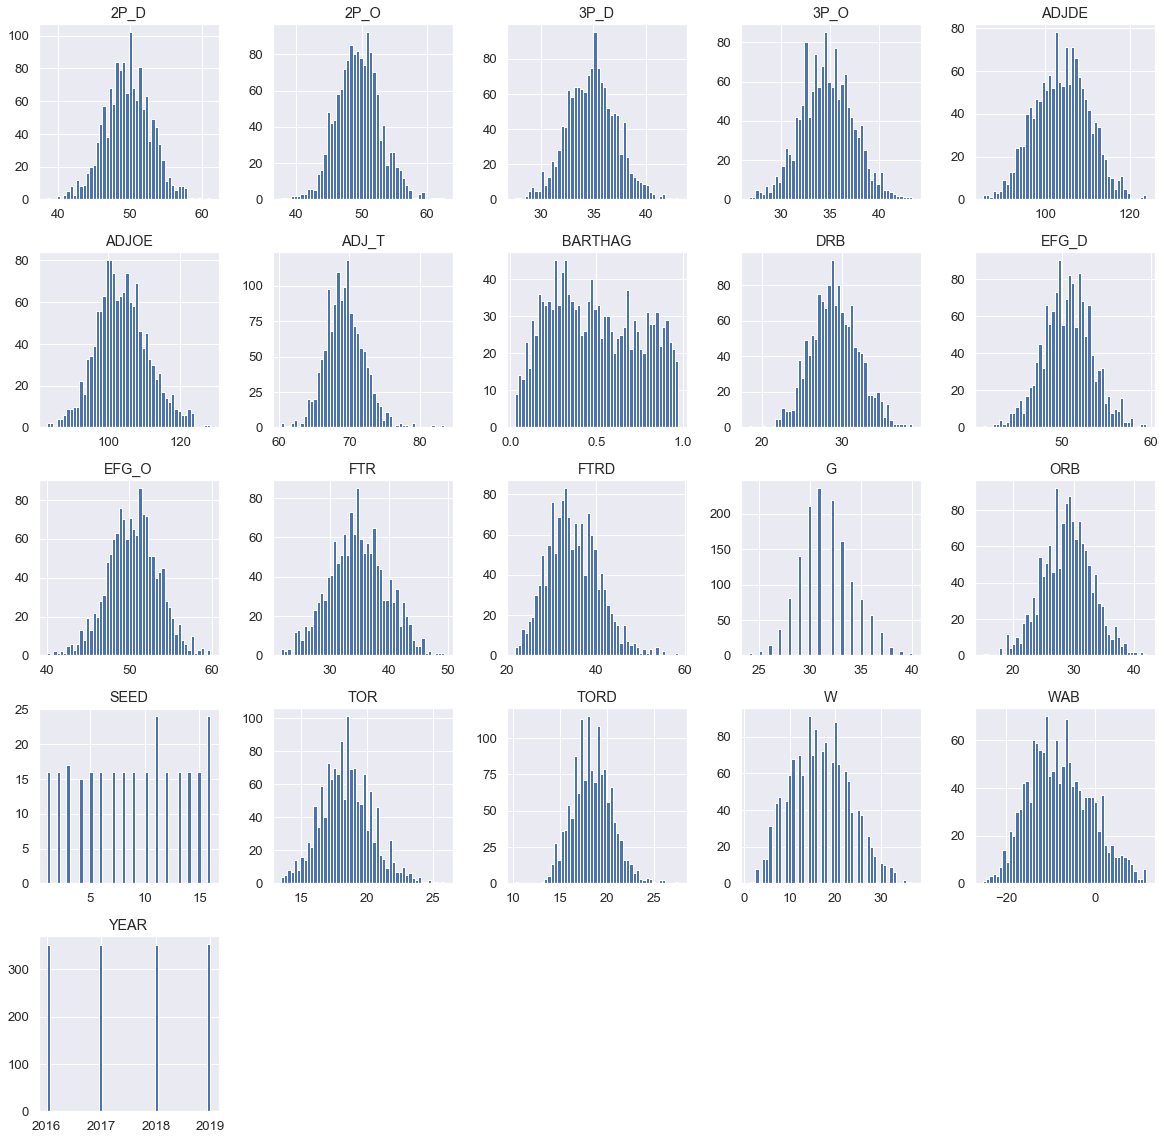

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

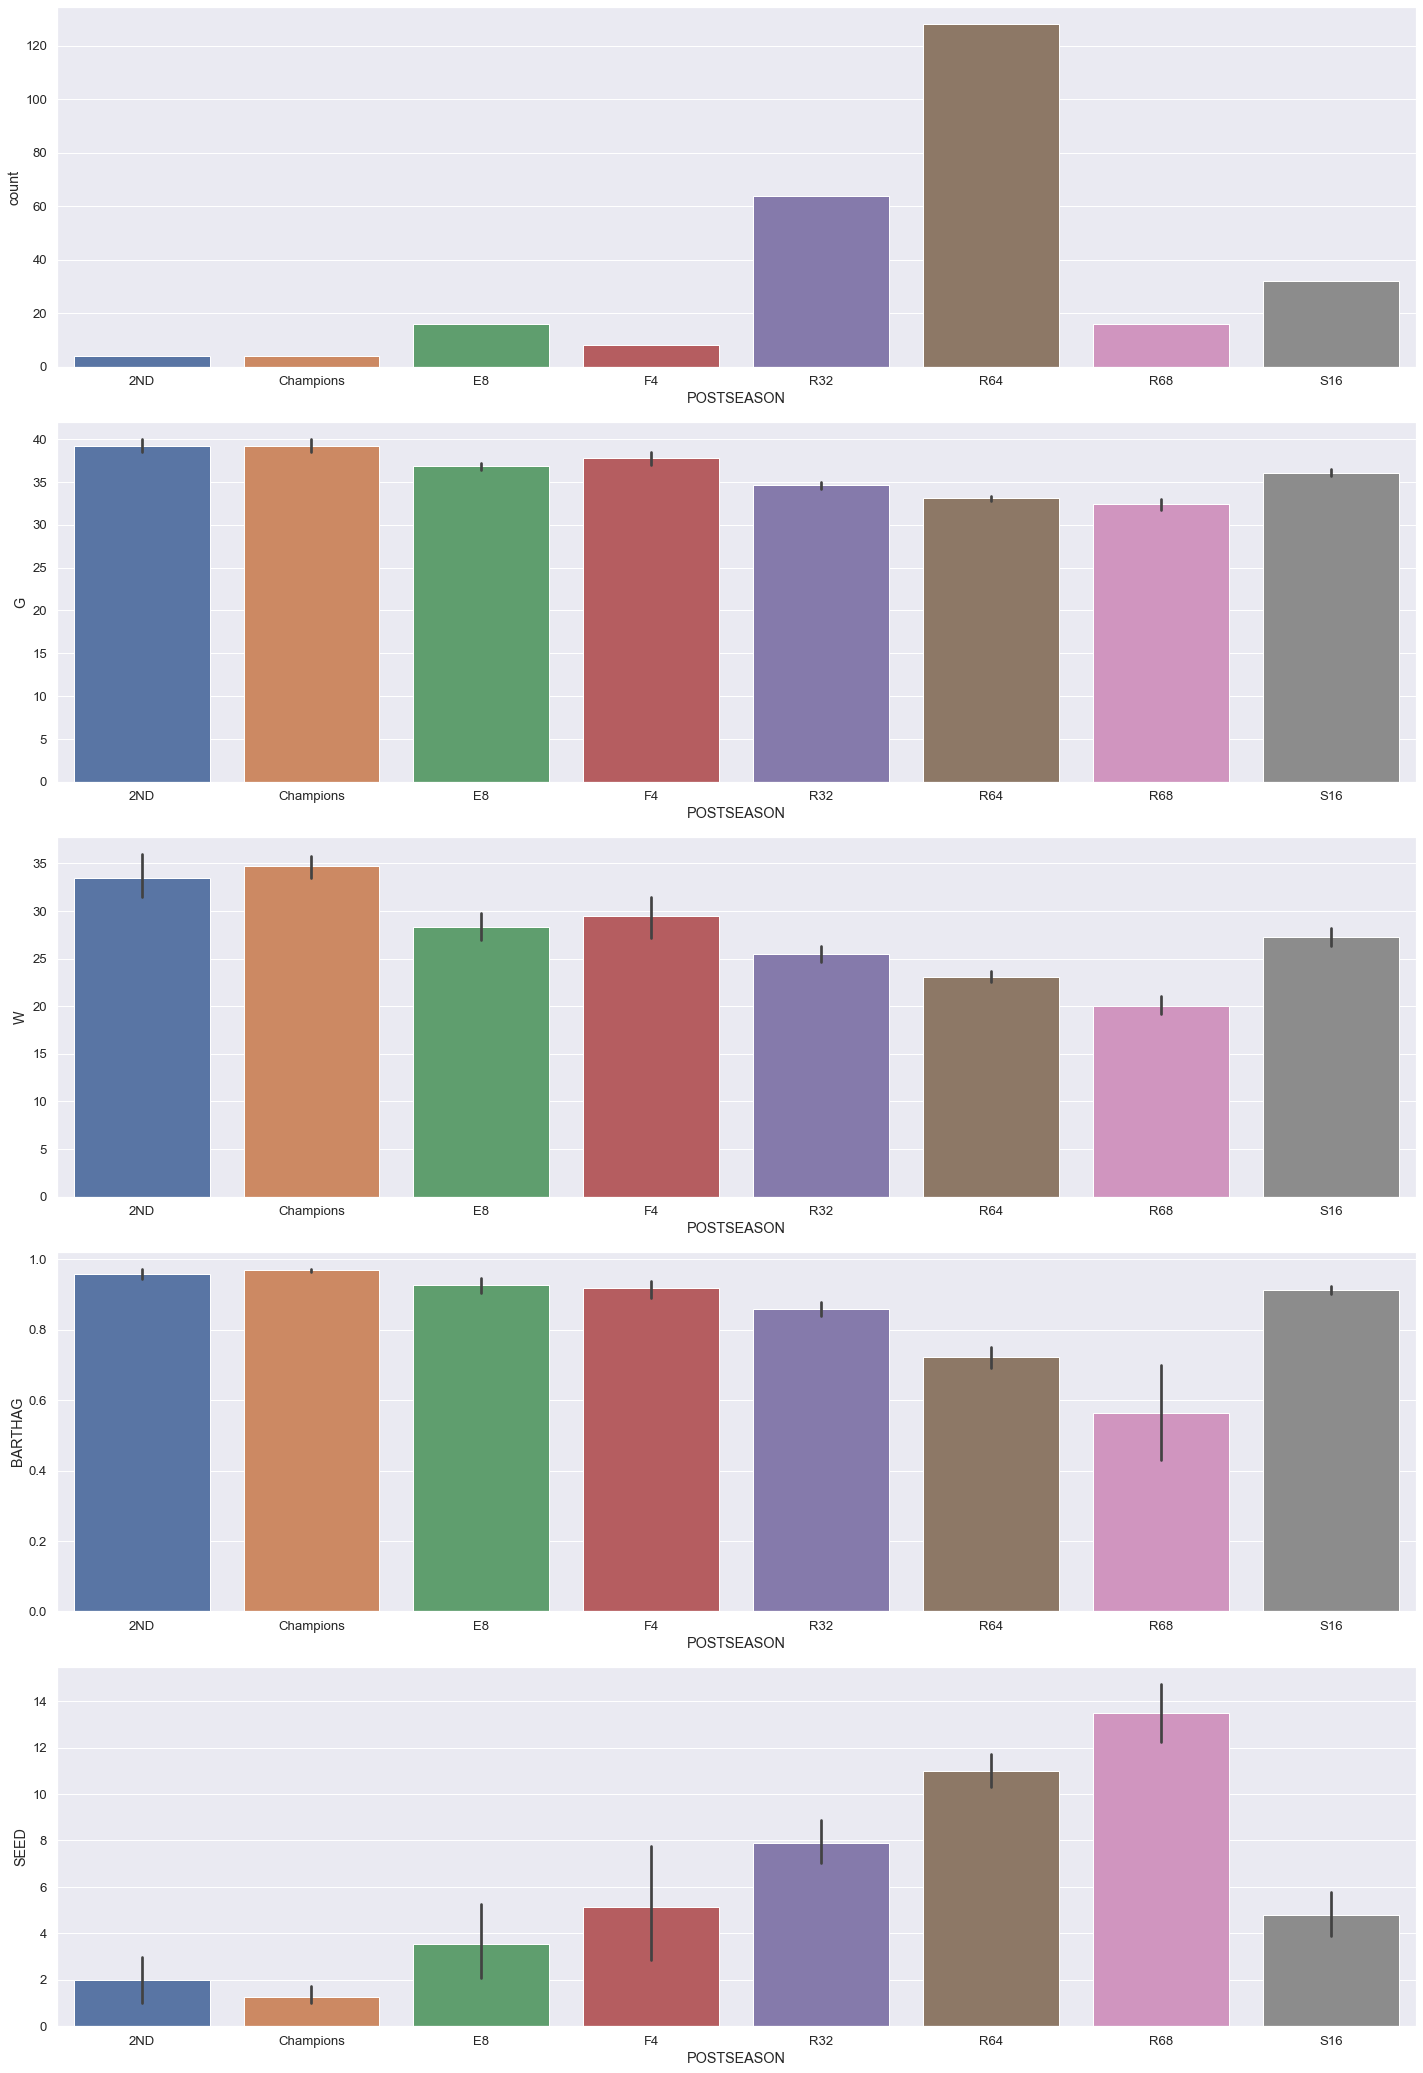

In [12]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
sns.countplot(df.POSTSEASON)

plt.subplot(7,1,2)
sns.barplot(x=df.POSTSEASON, y=df.G)

plt.subplot(7,1,3)
sns.barplot(x=df.POSTSEASON, y=df.W)

plt.subplot(7,1,4)
sns.barplot(x=df.POSTSEASON, y=df.BARTHAG)

plt.subplot(7,1,5)
sns.barplot(x=df.POSTSEASON, y=df.SEED)

plt.tight_layout()
plt.show()

In [13]:
df.corr()

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.694294  0.610036 -0.606560  0.684179  0.351768 -0.489071   
W        0.694294  1.000000  0.740726 -0.697598  0.808328  0.624627 -0.629084   
ADJOE    0.610036  0.740726  1.000000 -0.541147  0.876854  0.733943 -0.350522   
ADJDE   -0.606560 -0.697598 -0.541147  1.000000 -0.855484 -0.262971  0.789522   
BARTHAG  0.684179  0.808328  0.876854 -0.855484  1.000000  0.566685 -0.632959   
EFG_O    0.351768  0.624627  0.733943 -0.262971  0.566685  1.000000 -0.169170   
EFG_D   -0.489071 -0.629084 -0.350522  0.789522 -0.632959 -0.169170  1.000000   
TOR     -0.324177 -0.437440 -0.584143  0.220306 -0.464304 -0.343668  0.109440   
TORD     0.070928  0.163512 -0.100177 -0.229428  0.059057 -0.128320  0.002917   
ORB      0.276452  0.315491  0.289171 -0.274805  0.316404 -0.105013 -0.311194   
DRB     -0.168511 -0.362473 -0.243611  0.381923 -0.343430 -0.310620  0.233499   
FTR      0.093426  0.127848  0.072360 -0.099570  0.105572 -0.077106 -0.177110   
FTRD    -0.277845 -0.310100 -0.372815  0.195381 -0.328662 -0.403423  0.126941   
2P_O     0.343096  0.586644  0.637790 -0.286613  0.526996  0.887056 -0.192840   
2P_D    -0.446854 -0.542603 -0.346566  0.722451 -0.593379 -0.148363  0.901366   
3P_O     0.220460  0.432303  0.578285 -0.132148  0.401678  0.754215 -0.076390   
3P_D    -0.348541 -0.500085 -0.201922  0.560496 -0.423502 -0.129869  0.723797   
ADJ_T   -0.073626 -0.056288  0.039005  0.216587 -0.092839  0.039121  0.207273   
WAB      0.665949  0.901692  0.852331 -0.816995  0.943035  0.578435 -0.641557   
SEED    -0.605589 -0.579559 -0.803857  0.699601 -0.827624 -0.310675  0.385737   
YEAR     0.042113  0.073508 -0.016709 -0.018837  0.001464  0.108600  0.116721   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.324177  0.070928  0.276452 -0.168511  0.093426 -0.277845  0.343096   
W       -0.437440  0.163512  0.315491 -0.362473  0.127848 -0.310100  0.586644   
ADJOE   -0.584143 -0.100177  0.289171 -0.243611  0.072360 -0.372815  0.637790   
ADJDE    0.220306 -0.229428 -0.274805  0.381923 -0.099570  0.195381 -0.286613   
BARTHAG -0.464304  0.059057  0.316404 -0.343430  0.105572 -0.328662  0.526996   
EFG_O   -0.343668 -0.128320 -0.105013 -0.310620 -0.077106 -0.403423  0.887056   
EFG_D    0.109440  0.002917 -0.311194  0.233499 -0.177110  0.126941 -0.192840   
TOR      1.000000  0.082966  0.127515  0.142924  0.133536  0.295218 -0.259642   
TORD     0.082966  1.000000  0.107461  0.261749  0.093449  0.380354 -0.066384   
ORB      0.127515  0.107461  1.000000 -0.011514  0.261221  0.116237 -0.051205   
DRB      0.142924  0.261749 -0.011514  1.000000  0.063573  0.209985 -0.282591   
FTR      0.133536  0.093449  0.261221  0.063573  1.000000  0.202800 -0.029459   
FTRD     0.295218  0.380354  0.116237  0.209985  0.202800  1.000000 -0.390162   
2P_O    -0.259642 -0.066384 -0.051205 -0.282591 -0.029459 -0.390162  1.000000   
2P_D     0.097793  0.055925 -0.314253  0.240275 -0.173371  0.111617 -0.156709   
3P_O    -0.315127 -0.155566 -0.111172 -0.223843 -0.096331 -0.254971  0.377605   
3P_D     0.071761 -0.101289 -0.175745  0.130546 -0.096385  0.102307 -0.169483   
ADJ_T   -0.042741 -0.004097 -0.016860  0.215007  0.195328  0.092148  0.078710   
WAB     -0.453637  0.107251  0.342269 -0.308396  0.139299 -0.326459  0.539533   
SEED     0.266268  0.080201 -0.327773  0.105448  0.134524  0.260131 -0.247600   
YEAR     0.064392  0.056249 -0.129806 -0.180751 -0.299391 -0.254989  0.161103   

             2P_D      3P_O      3P_D     ADJ_T       WAB      SEED      YEAR  
G       -0.446854  0.220460 -0.348541 -0.073626  0.665949 -0.605589  0.042113  
W       -0.542603  0.432303 -0.500085 -0.056288  0.901692 -0.579559  0.073508  
ADJOE   -0.346566  0.578285 -0.201922  0.039005  0.852331 -0.803857 -0.016709  
ADJDE    0.722451 -0.132148  0.560496  0.216587 -0.816995  0.699601 -0.018837  
BARTHAG -0.593379  0.401678 -0.423502 -0.092839  0

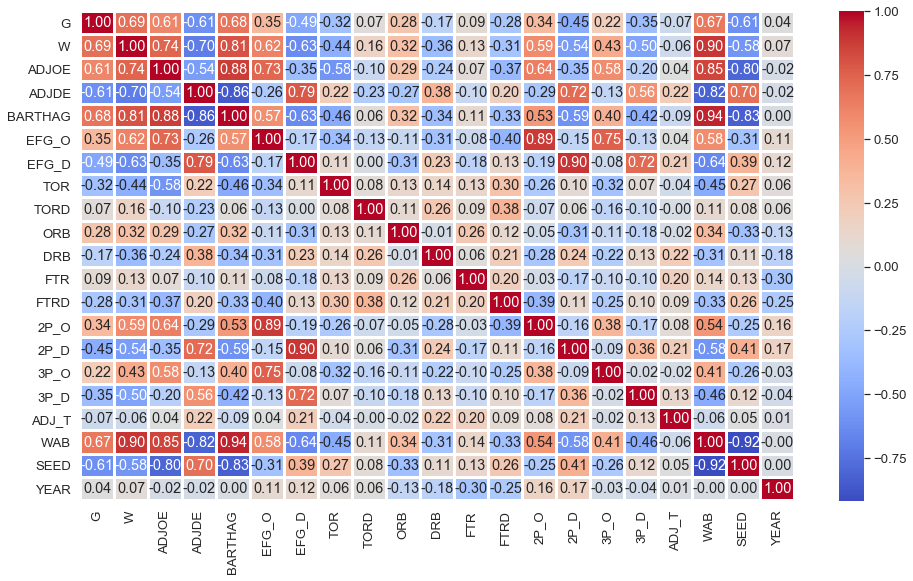

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

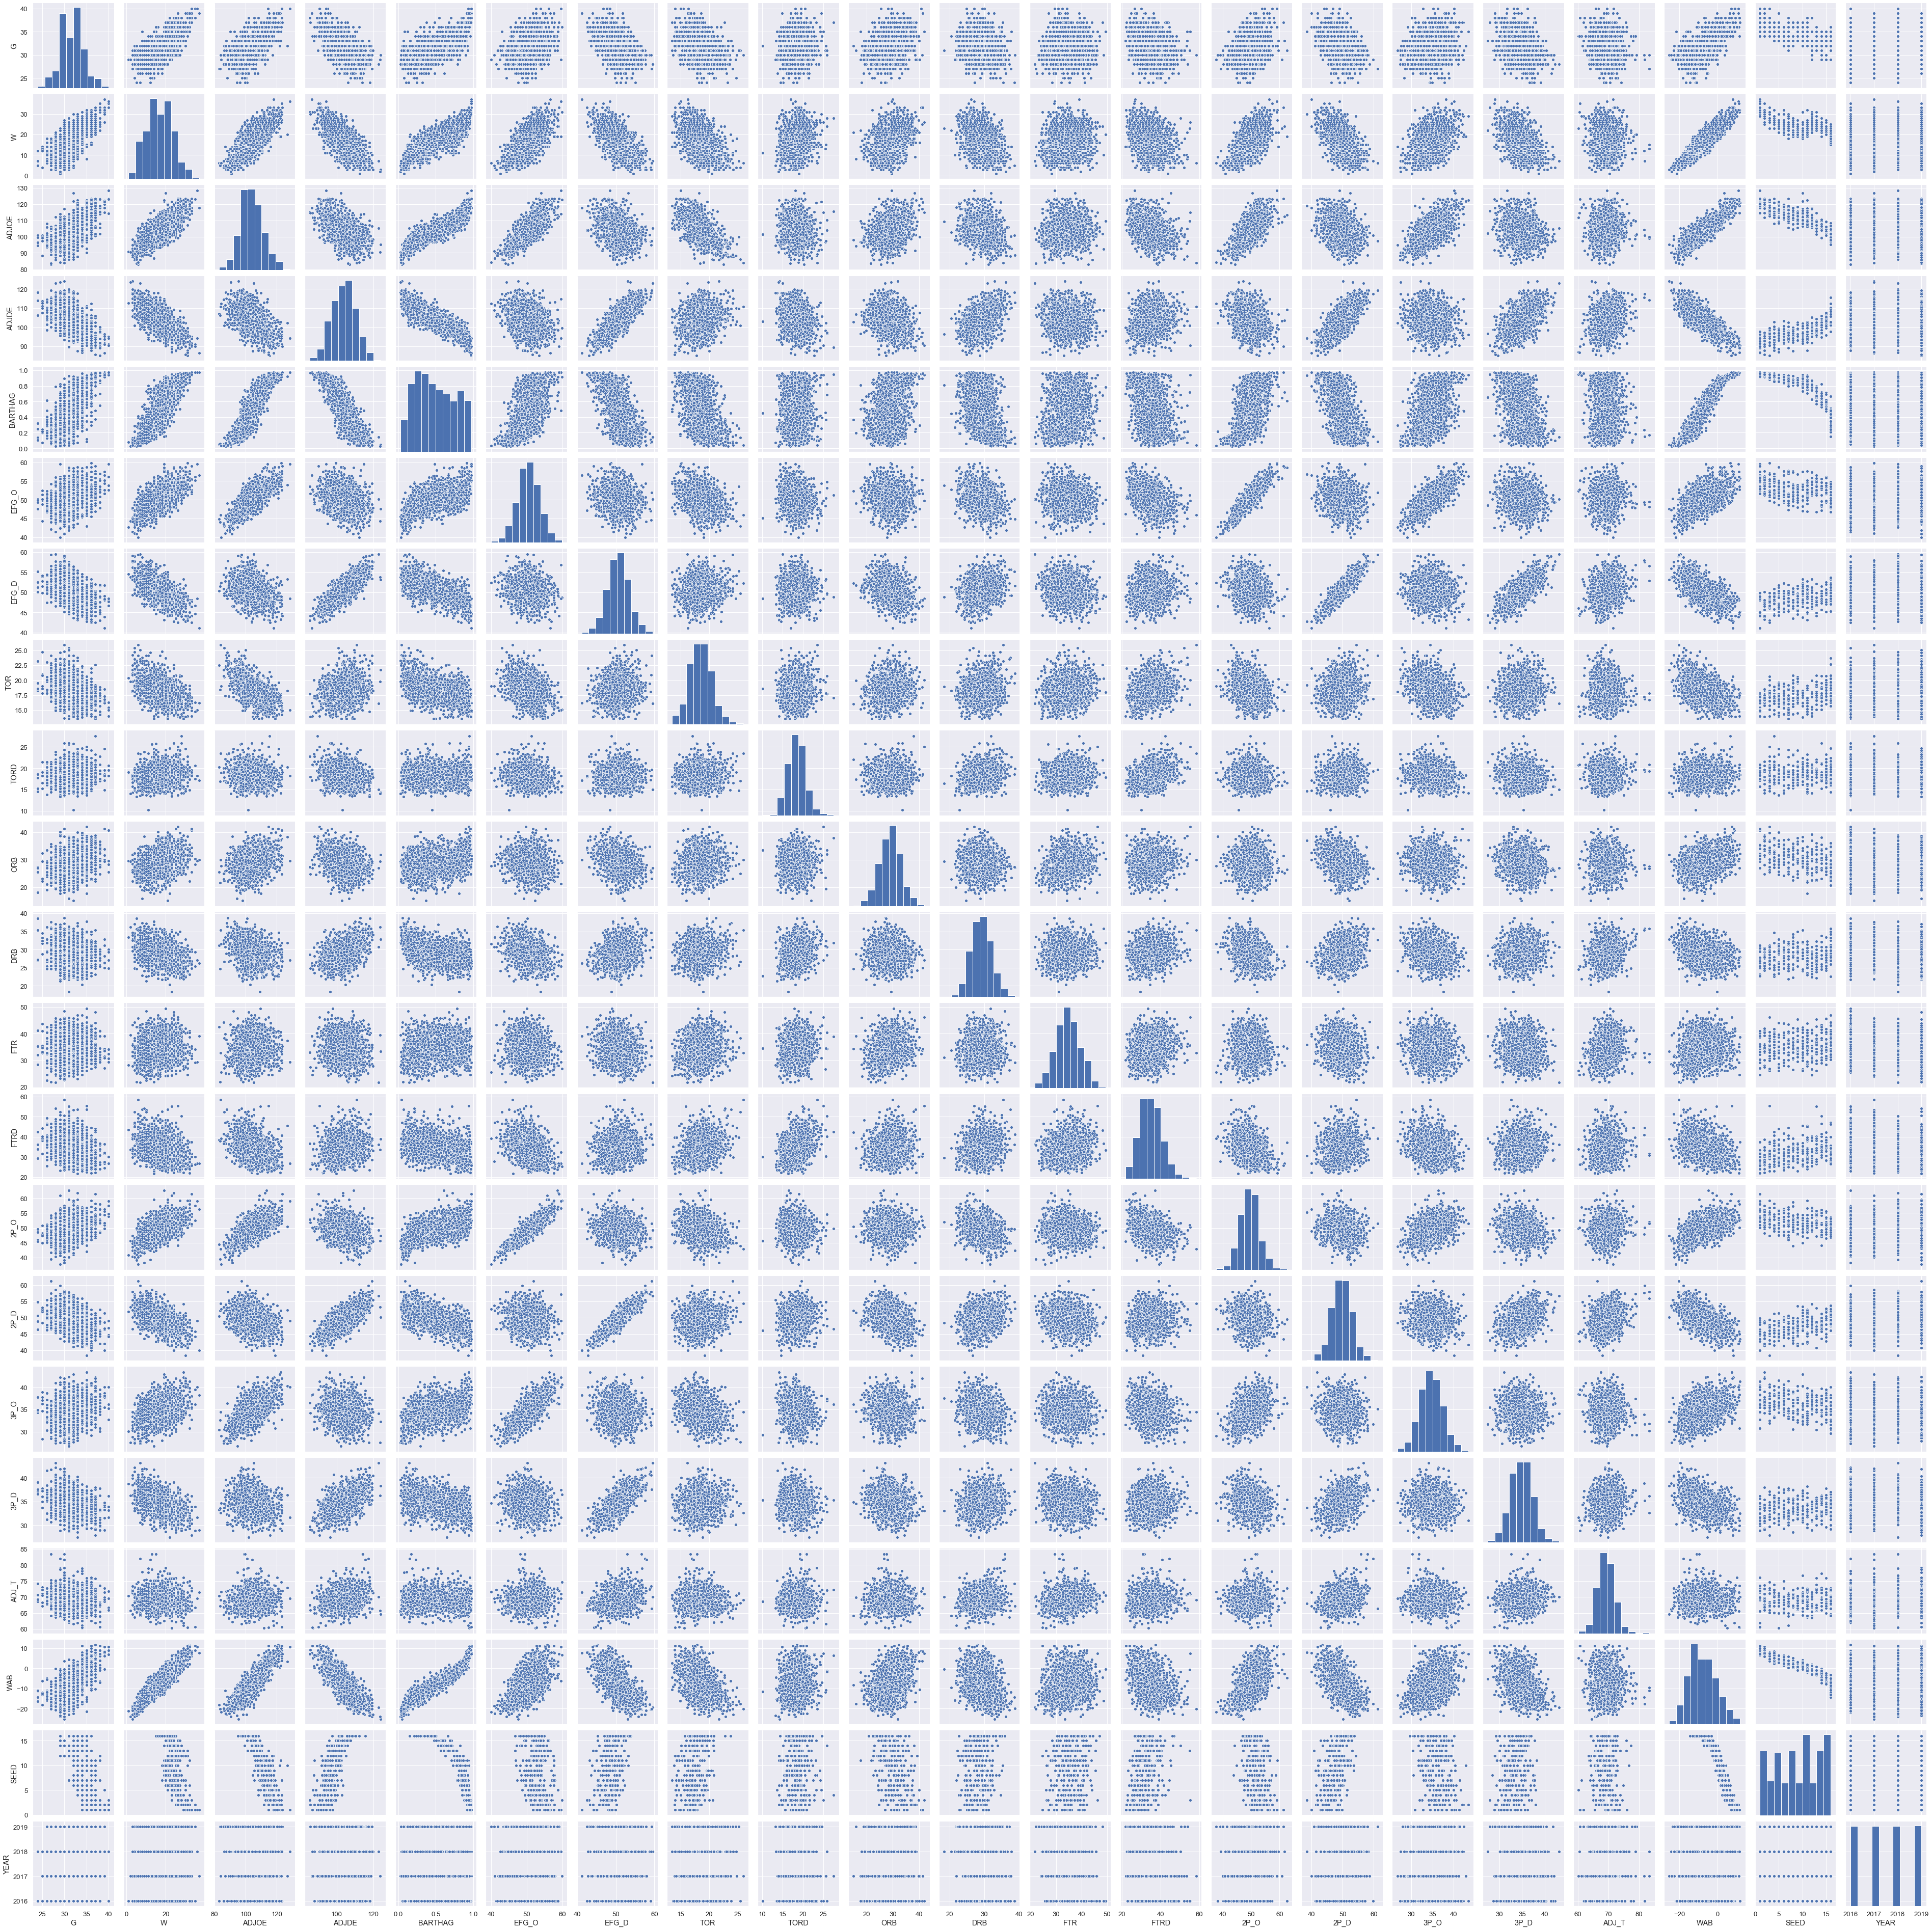

In [15]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [16]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
..              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
267         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
268        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
269          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
270             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
271       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1    20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
267  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
268  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
269  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
270  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
271  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

    POSTSEASON  SEED  YEAR  
0          2ND   1.0  2016  
1    Champions   2.0  2016  
2           E8   6.0  2016  
3           E8   1.0  2016  
4           E8   1.0  2016  
..         ...   ...   ...  
267        S16   3.0  2019  
268        S16   2.0  2019  
269        S16  12.0  2019  
270        S16   3.0  2019  
271        S16   2.0  2019  

[272 rows x 24 columns]

### Replacing values

Filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season

In [21]:
df['POSTSEASON'].value_counts()

R64          128
R32           64
S16           32
R68           16
E8            16
F4             8
Champions      4
2ND            4
Name: POSTSEASON, dtype: int64

### Create a new label (0 = NOT in S16,E8 and F4; 1 = WITHIN S16,E8 and F4)

In [22]:
df["POSTSEASON"].replace(to_replace=['R64','R32','R68','2ND','Champions'],value=0,inplace=True)

In [23]:
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
..              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
267         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
268        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
269          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
270             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
271       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1    20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
267  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
268  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
269  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
270  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
271  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

    POSTSEASON  SEED  YEAR  
0            0   1.0  2016  
1            0   2.0  2016  
2           E8   6.0  2016  
3           E8   1.0  2016  
4           E8   1.0  2016  
..         ...   ...   ...  
267        S16   3.0  2019  
268        S16   2.0  2019  
269        S16  12.0  2019  
270        S16   3.0  2019  
271        S16   2.0  2019  

[272 rows x 24 columns]

In [24]:
df["POSTSEASON"].replace(to_replace=['S16','E8','F4'],value=1,inplace=True)

In [25]:
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
..              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
267         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
268        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
269          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
270             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
271       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1    20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
267  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
268  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
269  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
270  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
271  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

     POSTSEASON  SEED  YEAR  
0             0   1.0  2016  
1             0   2.0  2016  
2             1   6.0  2016  
3             1   1.0  2016  
4             1   1.0  2016  
..          ...   ...   ...  
267           1   3.0  2019  
268           1   2.0  2019  
269           1  12.0  2019  
270           1   3.0  2019  
271           1   2.0  2019  

[272 rows x 24 columns]

### Treat Duplicate Values

In [26]:
df.duplicated(keep='first').sum()

0

### Drop unwanted features

In [27]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [28]:
df.drop(['TEAM', 'CONF', 'YEAR'],axis=1,inplace=True)

In [29]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0    40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1    40  35  123.1   90.9   0.9703   56.1   46.7  16.3  20.6  28.2  29.4   
2    36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1   
3    37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2   
4    37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
267  37  33  115.7   90.5   0.9439   52.1   42.5  16.5  18.2  34.4  26.0   
268  37  30  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8   
269  38  25  108.1   91.7   0.8687   52.0   46.4  17.8  20.9  29.6  28.8   
270  35  28  117.9   96.6   0.9081   51.2   49.9  17.9  20.1  36.7  30.8   
271  36  31  122.8   95.2   0.9488   55.3   48.1  15.8  18.0  31.6  30.2   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  
0    32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6           0   1.0  
1    34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9           0   2.0  
2    32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3           1   6.0  
3    32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6           1   1.0  
4    38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6           1   1.0  
..    ...   ...   ...   ...   ...   ...    ...   ...         ...   ...  
267  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8           1   3.0  
268  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2           1   2.0  
269  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1           1  12.0  
270  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3           1   3.0  
271  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9           1   2.0  

[272 rows x 21 columns]

In [30]:
df.columns

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

In [31]:
df = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'POSTSEASON']]

In [32]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0    40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1    40  35  123.1   90.9   0.9703   56.1   46.7  16.3  20.6  28.2  29.4   
2    36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1   
3    37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2   
4    37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
267  37  33  115.7   90.5   0.9439   52.1   42.5  16.5  18.2  34.4  26.0   
268  37  30  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8   
269  38  25  108.1   91.7   0.8687   52.0   46.4  17.8  20.9  29.6  28.8   
270  35  28  117.9   96.6   0.9081   51.2   49.9  17.9  20.1  36.7  30.8   
271  36  31  122.8   95.2   0.9488   55.3   48.1  15.8  18.0  31.6  30.2   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  POSTSEASON  
0    32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   1.0           0  
1    34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   2.0           0  
2    32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   6.0           1  
3    32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   1.0           1  
4    38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   1.0           1  
..    ...   ...   ...   ...   ...   ...    ...   ...   ...         ...  
267  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   3.0           1  
268  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   2.0           1  
269  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1  12.0           1  
270  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   3.0           1  
271  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   2.0           1  

[272 rows x 21 columns]

### Create and save processed dataset

In [33]:
df.to_csv("finaldataset.csv",index=False)

In [34]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0    40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1    40  35  123.1   90.9   0.9703   56.1   46.7  16.3  20.6  28.2  29.4   
2    36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1   
3    37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2   
4    37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
267  37  33  115.7   90.5   0.9439   52.1   42.5  16.5  18.2  34.4  26.0   
268  37  30  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8   
269  38  25  108.1   91.7   0.8687   52.0   46.4  17.8  20.9  29.6  28.8   
270  35  28  117.9   96.6   0.9081   51.2   49.9  17.9  20.1  36.7  30.8   
271  36  31  122.8   95.2   0.9488   55.3   48.1  15.8  18.0  31.6  30.2   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  POSTSEASON  
0    32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   1.0           0  
1    34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   2.0           0  
2    32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   6.0           1  
3    32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   1.0           1  
4    38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   1.0           1  
..    ...   ...   ...   ...   ...   ...    ...   ...   ...         ...  
267  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   3.0           1  
268  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   2.0           1  
269  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1  12.0           1  
270  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   3.0           1  
271  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   2.0           1  

[272 rows x 21 columns]

In [35]:
df["POSTSEASON"].value_counts()

0    216
1     56
Name: POSTSEASON, dtype: int64

### Train Test Split

In [36]:
df = pd.read_csv("finaldataset.csv")

In [37]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0    40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1    40  35  123.1   90.9   0.9703   56.1   46.7  16.3  20.6  28.2  29.4   
2    36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1   
3    37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2   
4    37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
267  37  33  115.7   90.5   0.9439   52.1   42.5  16.5  18.2  34.4  26.0   
268  37  30  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8   
269  38  25  108.1   91.7   0.8687   52.0   46.4  17.8  20.9  29.6  28.8   
270  35  28  117.9   96.6   0.9081   51.2   49.9  17.9  20.1  36.7  30.8   
271  36  31  122.8   95.2   0.9488   55.3   48.1  15.8  18.0  31.6  30.2   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  POSTSEASON  
0    32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   1.0           0  
1    34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   2.0           0  
2    32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   6.0           1  
3    32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   1.0           1  
4    38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   1.0           1  
..    ...   ...   ...   ...   ...   ...    ...   ...   ...         ...  
267  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   3.0           1  
268  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   2.0           1  
269  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1  12.0           1  
270  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   3.0           1  
271  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   2.0           1  

[272 rows x 21 columns]

In [38]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [39]:
X.values, y.values

(array([[ 40. ,  33. , 123.3, ...,  71.7,   8.6,   1. ],
        [ 40. ,  35. , 123.1, ...,  66.7,   8.9,   2. ],
        [ 36. ,  24. , 118.3, ...,  65.5,   2.3,   6. ],
        ...,
        [ 38. ,  25. , 108.1, ...,  65.4,  -1.1,  12. ],
        [ 35. ,  28. , 117.9, ...,  71.2,   7.3,   3. ],
        [ 36. ,  31. , 122.8, ...,  68.8,   9.9,   2. ]]),
 array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 20), (55, 20), (217,), (55,))

### Feature Scaling

In [42]:
X_train

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
28   33  21  106.3   97.4   0.7318   47.0   46.4  13.8  16.2  29.1  29.7   
237  34  24  111.7   95.9   0.8524   53.5   46.3  19.4  16.6  29.4  26.1   
253  33  24  106.4  101.1   0.6418   53.7   50.3  16.4  21.0  23.0  33.8   
5    37  30  118.4   96.2   0.9163   52.3   48.9  16.1  20.2  34.1  30.5   
33   33  21  119.3   99.2   0.8924   51.6   51.2  18.6  19.8  40.0  28.8   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
106  29  22  103.1  102.7   0.5112   53.4   50.7  18.3  19.6  26.0  27.8   
83   35  20  111.6   94.9   0.8661   54.0   46.7  20.5  15.9  29.2  27.3   
17   29  22  109.1   95.6   0.8209   52.2   46.7  19.9  17.8  39.3  24.3   
230  34  20  112.9   93.1   0.9023   50.9   46.7  17.5  16.1  29.1  25.9   
98   31  26  107.8  103.4   0.6169   53.9   49.3  17.9  17.4  33.8  29.6   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T  WAB  SEED  
28   26.6  28.7  44.9  46.3  33.7  31.2   66.5 -0.1  10.0  
237  35.1  35.9  50.0  45.1  38.8  32.4   70.5  2.7   5.0  
253  35.4  30.9  51.2  51.2  38.1  32.8   71.3 -1.3  14.0  
5    40.3  32.0  52.6  46.1  34.4  36.2   69.0  6.7   1.0  
33   38.6  38.6  49.8  49.1  37.4  36.9   67.4  3.5   5.0  
..    ...   ...   ...   ...   ...   ...    ...  ...   ...  
106  36.1  39.7  51.4  50.0  38.7  34.8   72.5 -5.3  15.0  
83   33.5  34.7  52.9  44.1  37.3  34.6   68.1  0.4   9.0  
17   41.7  33.3  51.4  45.5  36.0  32.7   66.8 -0.1  12.0  
230  34.9  32.0  50.6  46.0  34.2  32.0   68.6  2.3   7.0  
98   33.8  35.9  55.4  51.0  33.7  31.0   67.2 -1.7  14.0  

[217 rows x 20 columns]

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled

array([[-0.56294976, -0.94346073, -0.95085111, ..., -0.88999446,
        -0.34406822,  0.29209793],
       [-0.11050495, -0.22088081, -0.08665555, ...,  0.53662639,
         0.22727874, -0.77859888],
       [-0.56294976, -0.22088081, -0.93484748, ...,  0.82195056,
        -0.58893121,  1.14865538],
       ...,
       [-2.37272898, -0.70260076, -0.50274971, ..., -0.7829979 ,
        -0.34406822,  0.72037665],
       [-0.11050495, -1.1843207 ,  0.1053879 , ..., -0.14101851,
         0.14565774, -0.35032015],
       [-1.46783937,  0.26083914, -0.71079679, ..., -0.64033581,
        -0.6705522 ,  1.14865538]])

In [47]:
X_test_scaled

array([[-1.92028417, -0.46174078, -1.44696337, ...,  2.46256455,
        -0.97663093,  1.36279474],
       [ 0.79438466,  0.26083914,  0.1053879 , ...,  0.89328161,
         1.36997266, -0.99273824],
       [ 1.69927427,  0.26083914,  1.76976452, ..., -1.7816325 ,
         0.45173647, -0.35032015],
       ...,
       [ 0.34193985,  0.26083914,  0.40945671, ...,  0.67928848,
         1.18632542, -1.2068776 ],
       [ 0.34193985, -0.46174078,  0.98558708, ...,  0.03730909,
         0.55376271, -0.56445951],
       [ 0.34193985,  0.50169912,  1.14562329, ..., -0.71166686,
         1.08429918, -1.2068776 ]])

In [48]:
y_train

28     0
237    0
253    0
5      1
33     0
      ..
106    0
83     0
17     0
230    0
98     0
Name: POSTSEASON, Length: 217, dtype: int64

### Build LR model

In [49]:
model = LogisticRegression(random_state=123)

In [50]:
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = model.predict(X_test_scaled)

In [52]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
model.score(X_test,y_test)

0.2

In [54]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[43,  1],
       [ 9,  2]], dtype=int64)

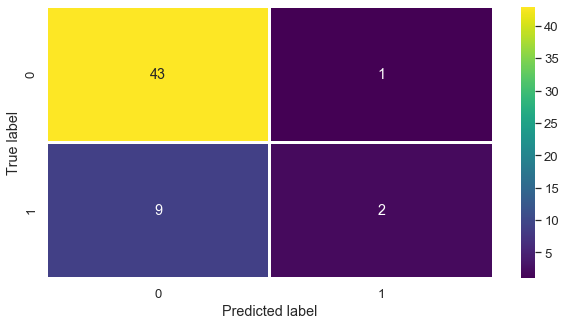

In [55]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.67      0.18      0.29        11

    accuracy                           0.82        55
   macro avg       0.75      0.58      0.59        55
weighted avg       0.79      0.82      0.77        55



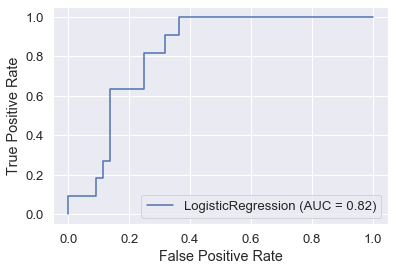

In [57]:
plot_roc_curve(model,X_test,y_test)
plt.show()

In [58]:
cv = cross_val_score(model,X,y,cv=10,verbose=1,scoring='f1')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [59]:
cv.mean()

0.4846464646464647

### Using RandomSearchCV

In [60]:
modelrs = LogisticRegression(random_state=123,n_jobs=-1)

In [61]:
parameters = {'C': np.arange(0.01,0.10,0.01),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }

In [62]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='f1')

In [63]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=123,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                

In [64]:
randm.best_estimator_

LogisticRegression(C=0.060000000000000005, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
randm.best_score_

0.5371479500891265

In [66]:
randm.best_params_

{'solver': 'newton-cg', 'C': 0.060000000000000005}

### Final Model

In [67]:
lrfinal = LogisticRegression(C=0.06,solver='newton-cg',random_state=123)

In [68]:
lrfinal.fit(X_train_scaled,y_train)

LogisticRegression(C=0.06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
newpred = lrfinal.predict(X_test_scaled)

In [70]:
newpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
cm = confusion_matrix(y_test,newpred)
cm

array([[44,  0],
       [ 9,  2]], dtype=int64)

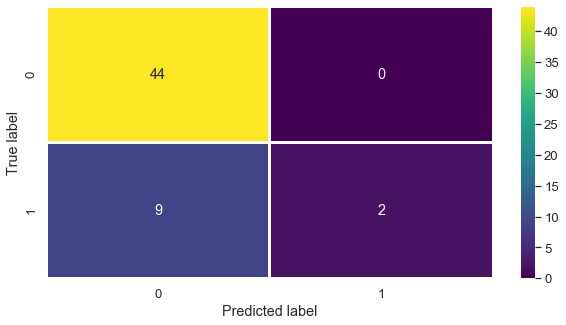

In [72]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [73]:
print(classification_report(y_test,newpred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        44
           1       1.00      0.18      0.31        11

    accuracy                           0.84        55
   macro avg       0.92      0.59      0.61        55
weighted avg       0.86      0.84      0.79        55



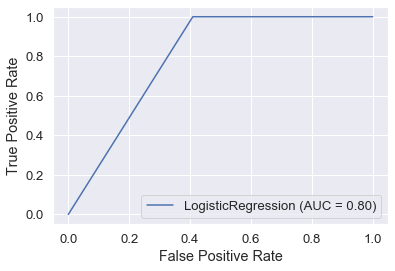

In [74]:
plot_roc_curve(lrfinal,X_test,y_test)
plt.show()

In [75]:
jaccard_score(y_test,newpred)

0.18181818181818182

In [76]:
testdata = pd.read_csv("testfinalset.csv")

In [77]:
testdata

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7  36.2   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  30.2  39.8   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  22.4  47.1   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  28.0  38.7   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  30.8  38.7   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   22.4  54.8  44.7  36.5  37.5   59.3  11.3   1.0  
1   23.9  55.9  46.3  38.7  31.4   66.4  10.7   1.0  
2   37.3  53.3  42.7  36.0  33.5   66.7   9.0   2.0  
3   30.5  57.0  42.0  40.0  33.0   65.2   7.8   2.0  
4   33.3  48.4  43.3  30.7  30.3   65.6   5.8   4.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
63  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
64  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
65  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
66  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
67  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[68 rows x 20 columns]

In [78]:
testpred = lrfinal.predict(testdata)

In [79]:
testpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [80]:
filename = 'basketballmodel.sav'
dump(lrfinal,open(filename,'wb'))

Now, it is your turn, use the training set to build an accurate model. Then use the validation set to report the accuracy of the model You should use the following algorithm:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression



### Model Training

### Using PyCaret

In [81]:
exp_class = setup(data = df, target = 'POSTSEASON', session_id=123, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


In [82]:
compare_models()

### K Nearest Neighbor (KNN)

### Question 1 Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)

In [83]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8182  0.8542  0.2500  0.5000  0.3333  0.2414
1       0.8636  0.6250  0.2500  1.0000  0.4000  0.3529
2       0.7727  0.8294  0.6000  0.5000  0.5455  0.3956
3       0.7273  0.8765  0.0000  0.0000  0.0000 -0.0820
4       0.7727  0.8000  0.4000  0.5000  0.4444  0.3038
5       0.8182  0.6529  0.4000  0.6667  0.5000  0.3973
6       0.7273  0.8176  0.4000  0.4000  0.4000  0.2235
7       0.7143  0.6176  0.5000  0.3333  0.4000  0.2222
8       0.8571  0.8088  0.2500  1.0000  0.4000  0.3505
9       0.7619  0.6691  0.2500  0.3333  0.2857  0.1463
Mean    0.7833  0.7551  0.3300  0.5233  0.3709  0.2552
SD      0.0511  0.0962  0.1584  0.2895  0.1422  0.1374

In [84]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 2 Determine and print the accuracy for the first 15 values of k the on the validation data:

### Decision Tree

In [86]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7727  0.6667  0.5000  0.4000  0.4444  0.3038
1       0.7727  0.5694  0.2500  0.3333  0.2857  0.1538
2       0.8182  0.8118  0.8000  0.5714  0.6667  0.5464
3       0.8636  0.7706  0.6000  0.7500  0.6667  0.5823
4       0.7273  0.4706  0.0000  0.0000  0.0000 -0.0820
5       0.8636  0.7706  0.6000  0.7500  0.6667  0.5823
6       0.9091  0.9412  1.0000  0.7143  0.8333  0.7732
7       0.9524  0.9706  1.0000  0.8000  0.8889  0.8591
8       0.9048  0.7500  0.5000  1.0000  0.6667  0.6182
9       0.8095  0.6912  0.5000  0.5000  0.5000  0.3824
Mean    0.8394  0.7413  0.5750  0.5819  0.5619  0.4719
SD      0.0677  0.1450  0.2943  0.2714  0.2518  0.2713

In [87]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [88]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 3 Determine the minimum value for the parameter max_depth that improves results

In [89]:
tuned_dt = tune_model('dt', optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8182  0.8958  0.7500  0.5000  0.6000  0.4884
1       0.8636  0.7917  0.5000  0.6667  0.5714  0.4923
2       0.8182  0.8529  0.8000  0.5714  0.6667  0.5464
3       0.8182  0.6706  0.4000  0.6667  0.5000  0.3973
4       0.7727  0.6882  0.6000  0.5000  0.5455  0.3956
5       0.8636  0.9353  0.6000  0.7500  0.6667  0.5823
6       0.9091  0.8706  0.8000  0.8000  0.8000  0.7412
7       0.6667  0.5294  0.5000  0.2857  0.3636  0.1600
8       0.9048  0.8676  0.7500  0.7500  0.7500  0.6912
9       0.7619  0.8162  0.5000  0.4000  0.4444  0.2953
Mean    0.8197  0.7918  0.6200  0.5890  0.5908  0.4790
SD      0.0693  0.1192  0.1382  0.1588  0.1282  0.1668

In [90]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=23, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

### Support Vector Machine

### Question 4 Train the support vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

In [91]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.7727  0.0  0.7500  0.4286  0.5455  0.4086
1       0.8636  0.0  0.5000  0.6667  0.5714  0.4923
2       0.9091  0.0  1.0000  0.7143  0.8333  0.7732
3       0.8182  0.0  0.4000  0.6667  0.5000  0.3973
4       0.7727  0.0  0.4000  0.5000  0.4444  0.3038
5       0.8636  0.0  0.8000  0.6667  0.7273  0.6374
6       0.9545  0.0  1.0000  0.8333  0.9091  0.8791
7       0.9048  0.0  1.0000  0.6667  0.8000  0.7407
8       1.0000  0.0  1.0000  1.0000  1.0000  1.0000
9       0.8571  0.0  0.7500  0.6000  0.6667  0.5772
Mean    0.8716  0.0  0.7600  0.6743  0.6998  0.6210
SD      0.0697  0.0  0.2364  0.1515  0.1758  0.2150

In [92]:
svm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
rbfsvm = create_model('rbfsvm')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8182  0.8611  0.2500  0.5000  0.3333  0.2414
1       0.8182  0.7917  0.0000  0.0000  0.0000  0.0000
2       0.9091  0.9294  0.6000  1.0000  0.7500  0.6986
3       0.7727  0.9529  0.0000  0.0000  0.0000  0.0000
4       0.8182  0.7647  0.2000  1.0000  0.3333  0.2787
5       0.8182  0.7765  0.2000  1.0000  0.3333  0.2787
6       0.9091  0.9529  0.6000  1.0000  0.7500  0.6986
7       0.7619  0.8088  0.2500  0.3333  0.2857  0.1463
8       0.8095  0.9118  0.0000  0.0000  0.0000  0.0000
9       0.9048  0.8676  0.5000  1.0000  0.6667  0.6182
Mean    0.8340  0.8617  0.2600  0.5833  0.3452  0.2961
SD      0.0518  0.0694  0.2234  0.4425  0.2815  0.2677

In [94]:
rbfsvm

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
evaluate_model(svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 5 Train a logistic regression model and determine the accuracy of the validation data (set C =0.01)

In [96]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9028  0.7500  0.6000  0.6667  0.5823
1       0.8636  0.9583  0.5000  0.6667  0.5714  0.4923
2       0.9545  0.9765  0.8000  1.0000  0.8889  0.8608
3       0.8636  0.9412  0.4000  1.0000  0.5714  0.5075
4       0.8182  0.8235  0.4000  0.6667  0.5000  0.3973
5       0.9545  0.9294  0.8000  1.0000  0.8889  0.8608
6       0.9545  0.9765  1.0000  0.8333  0.9091  0.8791
7       0.7619  0.8529  0.5000  0.4000  0.4444  0.2953
8       0.9524  0.9853  0.7500  1.0000  0.8571  0.8293
9       0.9524  0.9559  0.7500  1.0000  0.8571  0.8293
Mean    0.8939  0.9302  0.6650  0.8167  0.7155  0.6534
SD      0.0662  0.0520  0.1911  0.2083  0.1736  0.2109

In [97]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
tuned_lr = tune_model('lr', optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8182  0.9583  1.0000  0.5000  0.6667  0.5600
1       0.8182  0.9306  0.7500  0.5000  0.6000  0.4884
2       0.7727  1.0000  1.0000  0.5000  0.6667  0.5217
3       0.7273  0.8941  0.4000  0.4000  0.4000  0.2235
4       0.7727  0.8353  0.4000  0.5000  0.4444  0.3038
5       0.8636  0.9294  0.8000  0.6667  0.7273  0.6374
6       0.9091  0.9647  1.0000  0.7143  0.8333  0.7732
7       0.8571  0.9118  1.0000  0.5714  0.7273  0.6400
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8571  0.9559  0.7500  0.6000  0.6667  0.5772
Mean    0.8396  0.9380  0.8100  0.5952  0.6732  0.5725
SD      0.0736  0.0474  0.2289  0.1607  0.1645  0.2087

In [99]:
tuned_lr

LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Model Evaluation using Test set

### Question 5 Calculate the F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data. For f1_score please set the average parameter to 'micro'.

In [101]:
testdata = pd.read_csv("testfinalset.csv")

In [102]:
testdata

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7  36.2   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  30.2  39.8   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  22.4  47.1   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  28.0  38.7   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  30.8  38.7   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   22.4  54.8  44.7  36.5  37.5   59.3  11.3   1.0  
1   23.9  55.9  46.3  38.7  31.4   66.4  10.7   1.0  
2   37.3  53.3  42.7  36.0  33.5   66.7   9.0   2.0  
3   30.5  57.0  42.0  40.0  33.0   65.2   7.8   2.0  
4   33.3  48.4  43.3  30.7  30.3   65.6   5.8   4.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
63  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
64  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
65  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
66  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
67  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[68 rows x 20 columns]

In [103]:
predict_model(knn,data=testdata) #KNN

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB  ...  FTRD  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  ...  22.4   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  ...  23.9   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  ...  37.3   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  ...  30.5   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  ...  33.3   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...  ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  ...  32.3   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  ...  34.3   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  ...  55.5   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  ...  36.6   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  ...  33.3   

    2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  Label  Score  
0   54.8  44.7  36.5  37.5   59.3  11.3   1.0      0    0.4  
1   55.9  46.3  38.7  31.4   66.4  10.7   1.0      1    0.8  
2   53.3  42.7  36.0  33.5   66.7   9.0   2.0      1    1.0  
3   57.0  42.0  40.0  33.0   65.2   7.8   2.0      1    0.6  
4   48.4  43.3  30.7  30.3   65.6   5.8   4.0      1    0.6  
..   ...   ...   ...   ...    ...   ...   ...    ...    ...  
63  47.4  45.4  36.8  35.6   66.8   0.0  11.0      0    0.0  
64  52.3  41.4  40.1  31.2   61.4   3.7   5.0      0    0.2  
65  45.5  51.8  31.6  36.5   68.6   4.1   5.0      1    0.6  
66  48.9  42.6  35.4  35.3   62.6   4.2   7.0      1    0.6  
67  53.7  48.9  35.1  34.6   65.5   1.3   6.0      0    0.2  

[68 rows x 22 columns]

In [104]:
predict_model(dt,data=testdata) #Decision Tree

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB  ...  FTRD  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  ...  22.4   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  ...  23.9   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  ...  37.3   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  ...  30.5   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  ...  33.3   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...  ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  ...  32.3   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  ...  34.3   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  ...  55.5   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  ...  36.6   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  ...  33.3   

    2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  Label  Score  
0   54.8  44.7  36.5  37.5   59.3  11.3   1.0      0    0.0  
1   55.9  46.3  38.7  31.4   66.4  10.7   1.0      0    0.0  
2   53.3  42.7  36.0  33.5   66.7   9.0   2.0      0    0.0  
3   57.0  42.0  40.0  33.0   65.2   7.8   2.0      1    1.0  
4   48.4  43.3  30.7  30.3   65.6   5.8   4.0      0    0.0  
..   ...   ...   ...   ...    ...   ...   ...    ...    ...  
63  47.4  45.4  36.8  35.6   66.8   0.0  11.0      0    0.0  
64  52.3  41.4  40.1  31.2   61.4   3.7   5.0      0    0.0  
65  45.5  51.8  31.6  36.5   68.6   4.1   5.0      0    0.0  
66  48.9  42.6  35.4  35.3   62.6   4.2   7.0      0    0.0  
67  53.7  48.9  35.1  34.6   65.5   1.3   6.0      1    1.0  

[68 rows x 22 columns]

In [105]:
predict_model(svm,data=testdata) #SVM

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB  ...   FTR  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  ...  36.2   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  ...  39.8   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  ...  47.1   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  ...  38.7   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  ...  38.7   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...  ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  ...  35.7   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  ...  43.4   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  ...  40.4   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  ...  36.2   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  ...  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  Label  
0   22.4  54.8  44.7  36.5  37.5   59.3  11.3   1.0      0  
1   23.9  55.9  46.3  38.7  31.4   66.4  10.7   1.0      1  
2   37.3  53.3  42.7  36.0  33.5   66.7   9.0   2.0      0  
3   30.5  57.0  42.0  40.0  33.0   65.2   7.8   2.0      1  
4   33.3  48.4  43.3  30.7  30.3   65.6   5.8   4.0      1  
..   ...   ...   ...   ...   ...    ...   ...   ...    ...  
63  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0      1  
64  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0      0  
65  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0      1  
66  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0      0  
67  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0      1  

[68 rows x 21 columns]

In [106]:
predict_model(tuned_lr,data=testdata) #Logistic Regression

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB  ...  FTRD  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  ...  22.4   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  ...  23.9   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  ...  37.3   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  ...  30.5   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  ...  33.3   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...  ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  ...  32.3   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  ...  34.3   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  ...  55.5   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  ...  36.6   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  ...  33.3   

    2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  Label   Score  
0   54.8  44.7  36.5  37.5   59.3  11.3   1.0      0  0.0370  
1   55.9  46.3  38.7  31.4   66.4  10.7   1.0      1  0.9916  
2   53.3  42.7  36.0  33.5   66.7   9.0   2.0      0  0.2167  
3   57.0  42.0  40.0  33.0   65.2   7.8   2.0      1  0.9935  
4   48.4  43.3  30.7  30.3   65.6   5.8   4.0      1  0.5625  
..   ...   ...   ...   ...    ...   ...   ...    ...     ...  
63  47.4  45.4  36.8  35.6   66.8   0.0  11.0      0  0.3191  
64  52.3  41.4  40.1  31.2   61.4   3.7   5.0      0  0.0469  
65  45.5  51.8  31.6  36.5   68.6   4.1   5.0      0  0.2901  
66  48.9  42.6  35.4  35.3   62.6   4.2   7.0      0  0.0059  
67  53.7  48.9  35.1  34.6   65.5   1.3   6.0      1  0.9982  

[68 rows x 22 columns]